<h1 align="center">spaCy Tutorial from spaCy Team</h1>

## Chapter 3: Processing Pipelines

https://course.spacy.io/en/chapter3

This chapter will show you everything you need to know about spaCy's processing pipeline. <br>
You'll learn what goes on under the hood when you process a text, how to write your own components and add them to the pipeline, and how to use custom attributes to add your own metadata to the documents, spans and tokens.

### 1: Processing pipelines

#### What happens when you call nlp
---
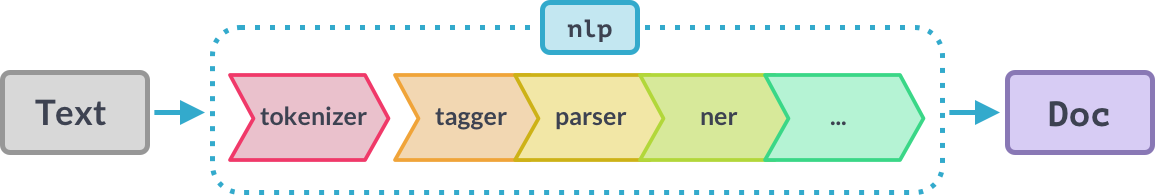

#### Built-in pipeline components
---
|Name|Description|Creates|
|-----|-----|-----|
|tagger|Part-of-speech tagger|Token.tag, Token.pos|
|parser|Dependency parser|Token.dep, Token.head, Doc.sents, Doc.noun_chunks|
|ner|Named entity recognizer|Doc.ents, Token.ent_iob, Token.ent_type|
|textcat|Text classifier|Doc.cats|

#### Under the hood
---
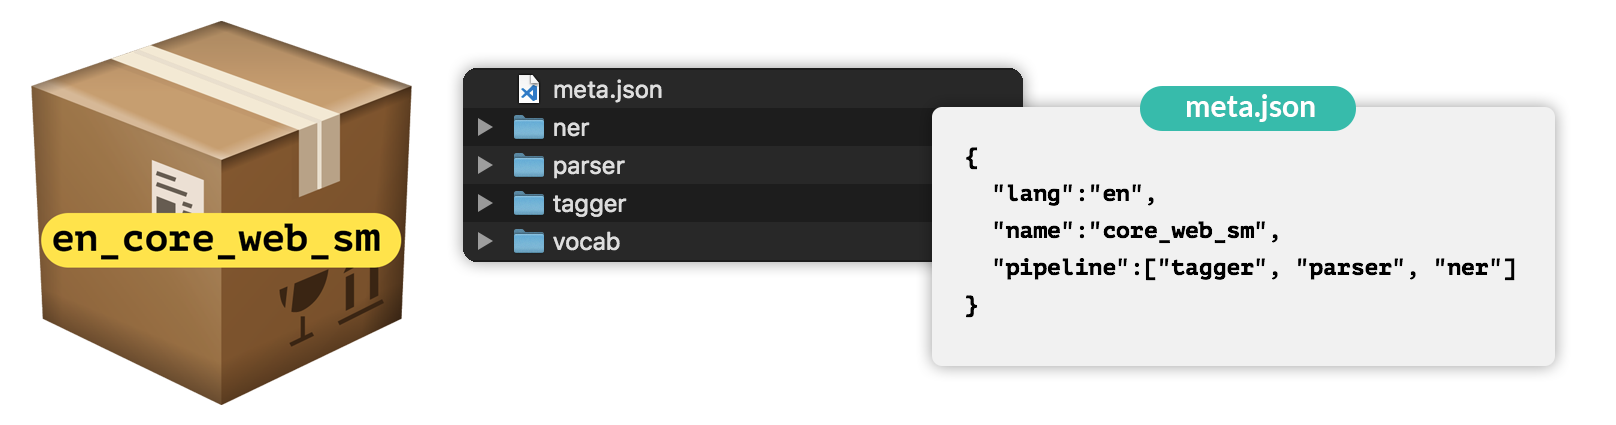

- Pipeline defined in model's ```meta.json``` in order
- Built-in components need binary data to make predictions

#### Pipeline attributes
---
- ```nlp.pipe_names```: list of pipeline component names<br>
```print(nlp.pipe_names)```

- ```nlp.pipeline```: list of ```(name, component)``` tuples<br>
```print(nlp.pipeline)```

### 2: What happens when you call nlp?

What does spaCy do when you call ```nlp``` on a string of text?

```doc = nlp("This is a sentence.")```

**Solution:** Tokenize the text and apply each pipeline component in order.

### 3: Inspecting the pipeline

Let’s inspect the small English model’s pipeline!
- Load the ```en_core_web_sm``` model and create the ```nlp``` object.
- Print the names of the pipeline components using ```nlp.pipe_names```.
- Print the full pipeline of ```(name, component)``` tuples using ```nlp.pipeline```.

In [1]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load("en_core_web_sm")

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline)

['tagger', 'parser', 'ner']
[('tagger', <spacy.pipeline.pipes.Tagger object at 0x00000292F24FAA88>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x00000292F23DCA08>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x00000292F23DCAC8>)]


### 4: Custom pipeline components

#### Why custom components?
---
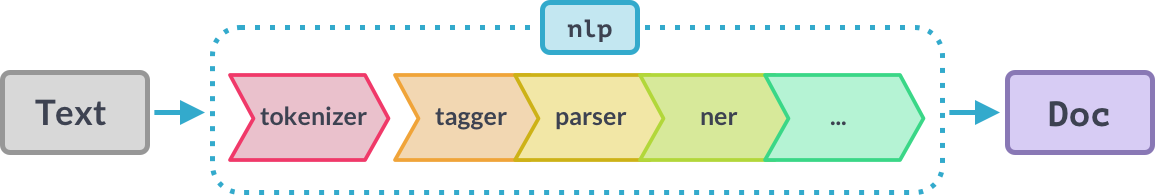

- Make a function execute automatically when you call ```nlp```
- Add your own metadata to documents and tokens
- Updating built-in attributes like ```doc.ents```

#### Anatomy of a component (1)
---
- Function that takes a doc, modifies it and returns it
- Can be added using the ```nlp.add_pipe``` method

```Python
def custom_component(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe(custom_component)
```

#### Anatomy of a component (2)
---
|Argument|Description|Example|
|------|-----|-----|
|last  |If True, add last   |nlp.add_pipe(component, last=True)|
|first |If True, add first  |nlp.add_pipe(component, first=True)|
|before|Add before component|nlp.add_pipe(component, before="ner")|
|after |Add after component |nlp.add_pipe(component, after="tagger")|


#### Example: a simple component (1)

In [2]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
def custom_component(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tagger', 'parser', 'ner']


#### Example: a simple component (2)

In [3]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
def custom_component(doc):

    # Print the doc's length
    print("Doc length:", len(doc))

    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

# Process a text
doc = nlp("Hello world!")

Doc length: 3


### 5: Use cases for custom components

Which of these problems can be solved by custom pipeline components? Choose all that apply!
1. Updating the pre-trained models and improving their predictions
2. Computing your own values based on tokens and their attributes
3. Adding named entities, for example based on a dictionary
4. Implementing support for an additional language

**Solution:** 2 and 3

### 6: Simple components

The example shows a custom component that prints the number of tokens in a document. Can you complete it?
- Complete the component function with the ```doc```’s length.
- Add the ```length_component``` to the existing pipeline as the first component.
- Try out the new pipeline and process any text with the ```nlp``` object – for example “This is a sentence.”.

In [4]:
import spacy

# Define the custom component
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc


# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe(length_component, first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("This is a sentence.")

['length_component', 'tagger', 'parser', 'ner']
This document is 5 tokens long.


### 7: Complex components

In this exercise, you’ll be writing a custom component that uses the ```PhraseMatcher``` to find animal names in the document and adds the matched spans to the ```doc.ents```. A ```PhraseMatcher``` with the animal patterns has already been created as the variable ```matcher```.
- Define the custom component and apply the ```matcher``` to the ```doc```.
- Create a ```Span``` for each match, assign the label ID for ```"ANIMAL"``` and overwrite the ```doc.ents``` with the new spans.
- Add the new component to the pipeline after the ```"ner"``` component.
- Process the text and print the entity text and entity label for the entities in ```doc.ents```.

In [5]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", None, *animal_patterns)

# Define the custom component
def animal_component(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe(animal_component, after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tagger', 'parser', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


### 8: Extension attributes

#### Setting custom attributes
---
- Add custom metadata to documents, tokens and spans
- Accessible via the ```._``` property


```Python
doc._.title = "My document"
token._.is_color = True
span._.has_color = False
```

- Registered on the global ```Doc```, ```Token``` or ```Span``` using the ```set_extension``` method


```Python
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)
```

#### Extension attribute types
---
1. Attribute extensions
2. Property extensions
3. Method extensions

#### Attribute extensions
---
- Set a default value that can be overwritten

In [6]:
import spacy
from spacy.tokens import Token

nlp = spacy.load("en_core_web_sm")

# Set extension on the Token with default value
# Token.set_extension("is_color", default=False)
Token.set_extension("is_color", force=True, default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

#### Property extensions (1)
---
- Define a getter and an optional setter function
- Getter only called when you retrieve the attribute value

In [7]:
import spacy
from spacy.tokens import Token

nlp = spacy.load("en_core_web_sm")

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
# Token.set_extension("is_color", getter=get_is_color)
Token.set_extension("is_color", getter=get_is_color, force=True)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

True - blue


#### Property extensions (2)
---
- Span extensions should almost always use a getter

In [8]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

True - sky is blue
False - The sky


#### Method extensions
---
- Assign a function that becomes available as an object method
- Lets you pass arguments to the extension function

In [9]:
import spacy
from spacy.tokens import Doc

nlp = spacy.load("en_core_web_sm")

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


### 9: Setting extension attributes (1)

Let’s practice setting some extension attributes.

#### Step 1
---
- Use ```Token.set_extension``` to register ```"is_country"``` (default ```False```).
- Update it for ```"Spain"``` and print it for all tokens.

In [10]:
from spacy.lang.en import English
from spacy.tokens import Token

nlp = English()

# Register the Token extension attribute "is_country" with the default value False
Token.set_extension("is_country", default=False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)]


#### Step 2
---
- Use Token.set_extension to register "reversed" (getter function get_reversed).
- Print its value for each token.

In [11]:
from spacy.lang.en import English
from spacy.tokens import Token

nlp = English()

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension "reversed" with the getter get_reversed
Token.set_extension("reversed", getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print("reversed:", token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


### 10. Setting extension attributes (2)
Let’s try setting some more complex attributes using getters and method extensions.

#### Part 1
---
- Complete the ```get_has_number``` function .
- Use ```Doc.set_extension``` to register ```"has_number"``` (getter ```get_has_number```) and print its value.

In [12]:
from spacy.lang.en import English
from spacy.tokens import Doc

nlp = English()

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)


# Register the Doc property extension "has_number" with the getter get_has_number
Doc.set_extension("has_number", getter=get_has_number)

# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", doc._.has_number)

has_number: True


#### Part 2
---
- Use ```Span.set_extension``` to register ```"to_html"``` (method ```to_html```).
- Call it on ```doc[0:2]``` with the tag ```"strong"```.

In [13]:
from spacy.lang.en import English
from spacy.tokens import Span

nlp = English()

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return f"<{tag}>{span.text}</{tag}>"


# Register the Span method extension "to_html" with the method to_html
Span.set_extension("to_html", method=to_html, force=True)

# Process the text and call the to_html method on the span with the tag name "strong"
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html("strong"))

<strong>Hello world</strong>


### 11: Entities and extensions
In this exercise, you’ll combine custom extension attributes with the model’s predictions and create an attribute getter that returns a Wikipedia search URL if the span is a person, organization, or location.

- Complete the ```get_wikipedia_url``` getter so it only returns the URL if the span’s label is in the list of labels.
- Set the ```Span``` extension ```"wikipedia_url"``` using the getter ```get_wikipedia_url```.
- Iterate over the entities in the ```doc``` and output their Wikipedia URL.

In [14]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")


def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if ent.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text


# Set the Span extension wikipedia_url using get getter get_wikipedia_url
Span.set_extension("wikipedia_url", getter=get_wikipedia_url, force=True)

doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

over fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


### 12: Components with extensions

Extension attributes are especially powerful if they’re combined with custom pipeline components. In this exercise, you’ll write a pipeline component that finds country names and a custom extension attribute that returns a country’s capital, if available.

A phrase matcher with all countries is available as the variable ```matcher```. A dictionary of countries mapped to their capital cities is available as the variable ```CAPITALS```.

- Complete the ```countries_component``` and create a ```Span``` with the label ```"GPE"``` (geopolitical entity) for all matches.
- Add the component to the pipeline.
- Register the Span extension attribute ```"capital"``` with the getter ```get_capital```.
- Process the text and print the entity text, entity label and entity capital for each entity span in ```doc.ents```.

In [15]:
import json
from spacy.lang.en import English
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("data/countries.json") as f:
    COUNTRIES = json.loads(f.read())

with open("data/capitals.json") as f:
    CAPITALS = json.loads(f.read())

nlp = English()
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", None, *list(nlp.pipe(COUNTRIES)))


def countries_component(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="GPE") for match_id, start, end in matches]
    return doc


# Add the component to the pipeline
nlp.add_pipe(countries_component)
print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

['countries_component']
[('Czech Republic', 'GPE', 'Prague'), ('Slovakia', 'GPE', 'Bratislava')]


### 13: Scaling and performance

#### Processing large volumes of text
---
- Use ```nlp.pipe``` method
- Processes texts as a stream, yields ```Doc``` objects
- Much faster than calling ```nlp``` on each text

##### BAD:
```docs = [nlp(text) for text in LOTS_OF_TEXTS]```

##### GOOD:
```docs = list(nlp.pipe(LOTS_OF_TEXTS))```

#### Passing in context (1)
---
- Setting ```as_tuples=True``` on ```nlp.pipe``` lets you pass in ```(text, context)``` tuples
- Yields ```(doc, context)``` tuples
- Useful for associating metadata with the ```doc```

In [16]:
from spacy.lang.en import English
nlp = English()
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

This is a text 15
And another text 16


#### Passing in context (2)

In [17]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

#### Using only the tokenizer (1)
---
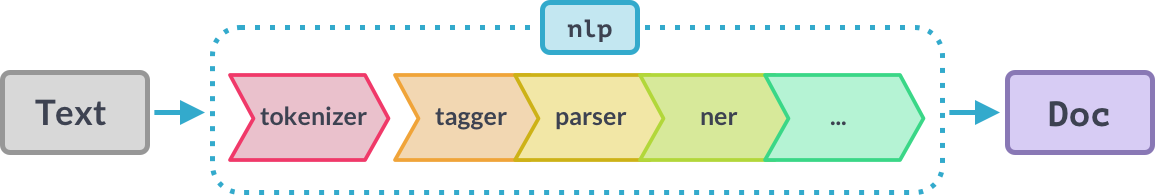

- don't run the whole pipeline!

#### Using only the tokenizer (2)
---
- Use ```nlp.make_doc``` to turn a text into a ```Doc``` object

##### BAD:

```doc = nlp("Hello world")```

##### GOOD:
```doc = nlp.make_doc("Hello world!")```

#### Disabling pipeline components
---
- Use ```nlp.disable_pipes``` to temporarily disable one or more pipes

```Python
# Disable tagger and parser
with nlp.disable_pipes("tagger", "parser"):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)
```
- Restores them after the ```with``` block
- Only runs the remaining components

### 14: Processing streams
In this exercise, you’ll be using ```nlp.pipe``` for more efficient text processing. The ```nlp``` object has already been created for you. A list of tweets about a popular American fast food chain are available as the variable ```TEXTS```.

#### Part 1
---
- Rewrite the example to use ```nlp.pipe```. Instead of iterating over the texts and processing them, iterate over the doc objects yielded by ```nlp.pipe```.

In [18]:
import json
import spacy

nlp = spacy.load("en_core_web_sm")

# with open("exercises/en/tweets.json") as f:
with open("data/tweets.json") as f:
    TEXTS = json.loads(f.read())

# Process the texts and print the adjectives
# for text in TEXTS:
#     doc = nlp(text)
#     print([token.text for token in doc if token.pos_ == "ADJ"])

for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == "ADJ"])

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
['BAD']
['terrible']


#### Part 2
---
- Rewrite the example to use ```nlp.pipe```. Don’t forget to call ```list()``` around the result to turn it into a list.

In [19]:
import json
import spacy

nlp = spacy.load("en_core_web_sm")

with open("data/tweets.json") as f:
    TEXTS = json.loads(f.read())

# Process the texts and print the entities
# docs = [nlp(text) for text in TEXTS]
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

(McDonalds,) (@McDonalds,) (McDonalds,) (McDonalds, Spain) (times!!, The Arch Deluxe) (#McRib SANDWICH,) (This morning, gettin mcdonalds)


#### Part 3
---
- Rewrite the example to use ```nlp.pipe```. Don’t forget to call ```list()``` around the result to turn it into a list.

In [20]:
from spacy.lang.en import English

nlp = English()

people = ["David Bowie", "Angela Merkel", "Lady Gaga"]

# Create a list of patterns for the PhraseMatcher
# patterns = [nlp(person) for person in people]
patterns = list(nlp.pipe(people))

### 15: Processing data with context
In this exercise, you’ll be using custom attributes to add author and book meta information to quotes.

A list of ```[text, context]``` examples is available as the variable DATA. The texts are quotes from famous books, and the contexts dictionaries with the keys ```"author"``` and ```"book"```.

- Use the ```set_extension``` method to register the custom attributes ```"author"``` and ```"book"``` on the ```Doc```, which default to ```None```.
- Process the ```[text, context]``` pairs in ```DATA``` using ```nlp.pipe``` with ```as_tuples=True```.
- Overwrite the ```doc._.book``` and ```doc._.author``` with the respective info passed in as the context.

In [21]:
import json
from spacy.lang.en import English
from spacy.tokens import Doc

with open("data/bookquotes.json") as f:
    DATA = json.loads(f.read())

nlp = English()

# Register the Doc extension "author" (default None)
Doc.set_extension("author", default=None)

# Register the Doc extension "book" (default None)
Doc.set_extension("book", default=None)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context["book"]
    doc._.author = context["author"]

    # Print the text and custom attribute data
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.
 — 'Metamorphosis' by Franz Kafka

I know not all that may be coming, but be it what it will, I'll go to it laughing.
 — 'Moby-Dick or, The Whale' by Herman Melville

It was the best of times, it was the worst of times.
 — 'A Tale of Two Cities' by Charles Dickens

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.
 — 'On the Road' by Jack Kerouac

It was a bright cold day in April, and the clocks were striking thirteen.
 — '1984' by George Orwell

Nowadays people know the price of everything and the value of nothing.
 — 'The Picture Of Dorian Gray' by Oscar Wilde



### 16: Selective processing
In this exercise, you’ll use the ```nlp.make_doc``` and ```nlp.disable_pipes``` methods to only run selected components when processing a text.

#### Part 1
---
- Rewrite the code to only tokenize the text using ```nlp.make_doc```.

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Only tokenize the text
# doc = nlp(text)
doc = nlp.make_doc(text)
print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']


#### Part 2
---
- Disable the tagger and parser using the ```nlp.disable_pipes``` method.
- Process the text and print all entities in the ```doc```.

In [23]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Disable the tagger and parser
with nlp.disable_pipes("tagger","parser"):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print([token.text for token in doc])

['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.']
